# Tilt Versus Translation Transfer Functions

In [1]:
import obspy
import obspy.clients.fdsn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rc('pdf', fonttype=42)

plt.style.use("/home/mchristo/proj/libmsc/style/msc.mplstyle")

In [2]:
iris = obspy.clients.fdsn.Client("IRIS")
inv = iris.get_stations(network="AV", station="AU11", level="RESP")

In [3]:
t0 = obspy.UTCDateTime("2006-01-15T00:00:00")
resp = inv.get_response("AV.AU11..HHE", t0)

In [4]:
freq = np.logspace(-4, np.log10(50), 50000)
Id = resp.get_evalresp_response_for_frequencies(freq, end_stage=1, output="DISP")
Iv = resp.get_evalresp_response_for_frequencies(freq, end_stage=1, output="VEL")
Ia = resp.get_evalresp_response_for_frequencies(freq, end_stage=1, output="ACC")

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


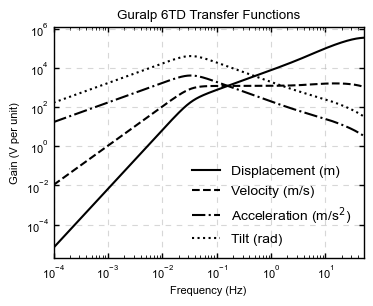

In [5]:
plt.figure(figsize=(4,3))
plt.loglog(freq, np.abs(Id), label="Displacement (m)")
plt.loglog(freq, np.abs(Iv), label="Velocity (m/s)")
plt.loglog(freq, np.abs(Ia), label="Acceleration (m/s$^2$)")

g = 9.8
w = 2*np.pi*freq

plt.xlim(freq[0], freq[-1])
plt.loglog(freq, np.abs(Ia * (-g)), label="Tilt (rad)")

plt.xlabel("Frequency (Hz)", fontsize=8)
plt.ylabel("Gain (V per unit)", fontsize=8)
plt.legend(fontsize=10, frameon=False)
plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.savefig("figs/tilt_xfer.pdf", bbox_inches="tight")

plt.title("Guralp 6TD Transfer Functions")

plt.savefig("figs/png/tilt_xfer.png", dpi=300, bbox_inches="tight")
